# Projekt nr. 1 - kamień milowy 1

# Michał Gromadzki, Mateusz Flis

# Importowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import *
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Wczytanie zbioru danych

In [3]:
df = pd.read_csv("census_income_dataset.csv")
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582.0,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,160187.0,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642.0,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,45781.0,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,159449.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


# EDA

## 1. Podstawowe informacje o zbiorze

Zbiór danych składa się z 44842 obserwacji, opisanych za pomocą 15 kolumn. Zbiór nie zawiera wartości null.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education_num   48842 non-null  int64  
 5   marital_status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital_gain    48842 non-null  float64
 11  capital_loss    48842 non-null  float64
 12  hours_per_week  48842 non-null  float64
 13  native_country  48842 non-null  object 
 14  income_level    48842 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


Brak braków danych.

|"Name"			|"Type"		|"Description"																																																					|
|-----------------------|---------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|	
|"age"			|"integer"	|"age of individual"																																																				|
|"workclass"		|"string"	|"Values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked"																																								|
|"fnlwgt"		|"float"	|"Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups"																																						|
|"education"		|"string"	|"Values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool"																																		|
|"education_num"	|"integer"	|""																																																						|
|"marital_status"	|"string"	|"Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse"																																								|
|"occupation"		|"string"	|"Values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces"																										|
|"relationship"		|"string"	|"Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried"																																													|
|"race"			|"string"	|"Values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black"																																														|
|"sex"			|"string"	|"Values: Female, Male"																																																				|
|"capital_gain"		|"float"	|""																																																						|	
|"capital_loss"		|"float"	|""																																																						|
|"hours_per_week"	|"float"	|"working hours per week"																																																			|
|"native_country"	|"string"	|"Values: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands"	|
|"income_level"		|"string"	|"Predictor class if individual earns greater or less than $50000 per year. Values: <=50K, >50K"																																										|

In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Przegląd wizualizacji

In [6]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education_num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital_gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital_loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours_per_week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


Małe korelacje między zmiennymi.

### Rozkład zmiennych ciągłych

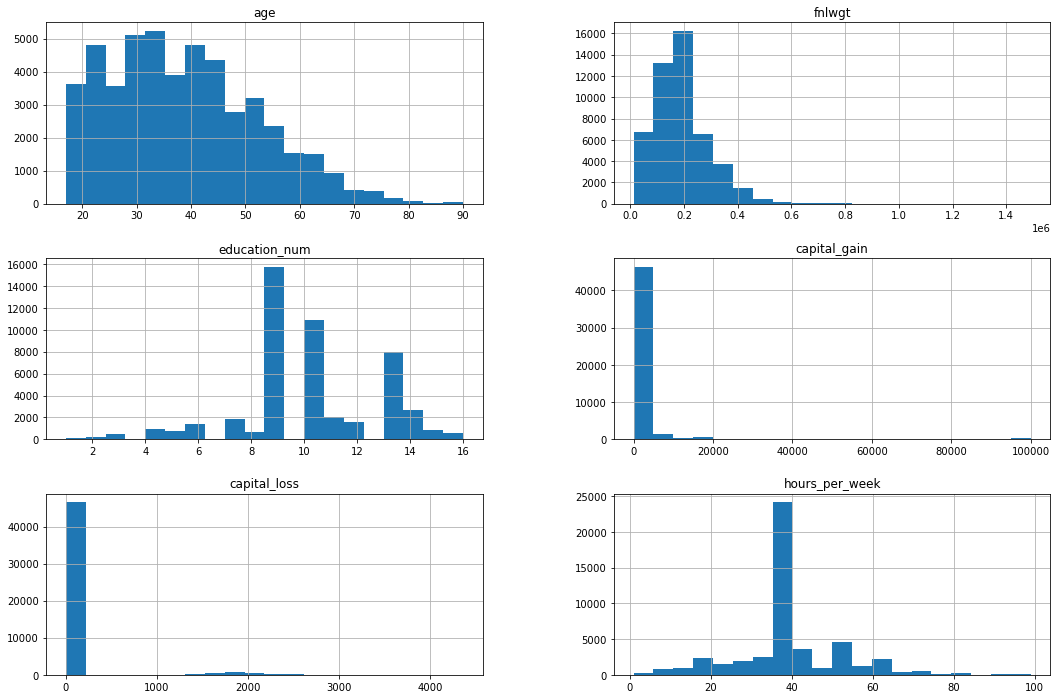

In [7]:
df.hist(bins = 20, figsize=(18, 12))
plt.show()

Education_num to zmienna kategorycza, liczby 1-16 odpowiadają róznym stopniom wykształcenia.

Tylko zmienna education_num jest zmienną kategoryczną.

### Rozkłady zmiennych kategorycznych

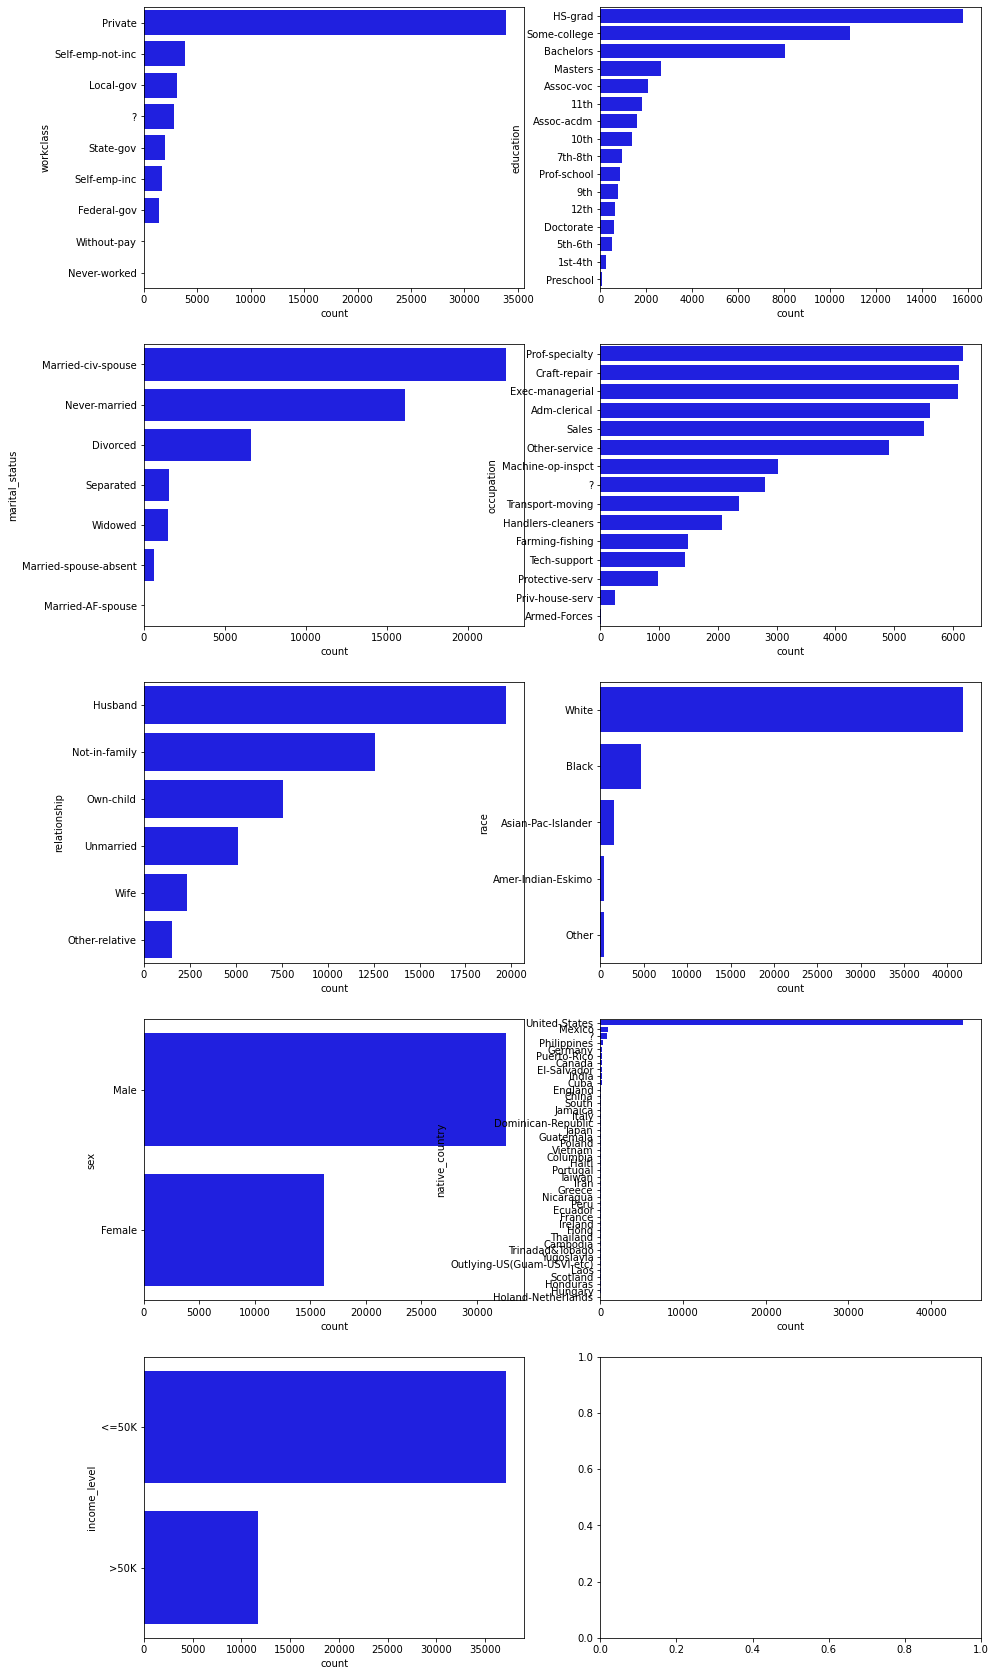

In [8]:
notNum = df.loc[:, ~df.columns.isin(['fnlwgt', 'age', 'capital_gain','capital_loss','hours_per_week','education_num'])]
cat_columns = notNum.columns.values.tolist()
fig, ax = plt.subplots(5,2, figsize = (15,30))
for i in range(len(cat_columns)):
    sns.countplot(y = cat_columns[i], order = df[cat_columns[i]].value_counts().index, data = df, ax = ax[i//2, i%2], color='b')

In [9]:
df['native_country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Można się zastanowić nad zmiejszeniem liczby kategorii.

# Przygotowanie danych pod wykresy

## Transformacje zmiennych ciągłych na dyskretne

### Age

In [10]:
df['age_compressed'] = df['age']
df['age_compressed'] = np.where(df['age'] < 20, "less than 20", df['age_compressed'])
df['age_compressed'] = np.where(df['age'] >= 20, "20 - 29", df['age_compressed'])
df['age_compressed'] = np.where(df['age'] >= 30, "30 - 39", df['age_compressed'])
df['age_compressed'] = np.where(df['age'] >= 40, "40 - 49", df['age_compressed'])
df['age_compressed'] = np.where(df['age'] >= 50, "50 - 59", df['age_compressed'])
df['age_compressed'] = np.where(df['age'] >= 60, "60 - 69", df['age_compressed'])
df['age_compressed'] = np.where(df['age'] >= 70, "70 or more", df['age_compressed'])
df['age_compressed'].value_counts()

30 - 39         12929
20 - 29         12005
40 - 49         10724
50 - 59          6619
60 - 69          3054
less than 20     2510
70 or more       1001
Name: age_compressed, dtype: int64

### Capital_gain

In [11]:
df['capital_gain_compressed'] = df['capital_gain']
df['capital_gain_compressed'] = np.where(df['capital_gain'] == 0, "0", df['capital_gain_compressed'])
df['capital_gain_compressed'] = np.where(df['capital_gain'] > 0, "1 - 5000", df['capital_gain_compressed'])
df['capital_gain_compressed'] = np.where(df['capital_gain'] > 5000, "5001 - 10000", df['capital_gain_compressed'])
df['capital_gain_compressed'] = np.where(df['capital_gain'] > 10000, "10001 - 15000", df['capital_gain_compressed'])
df['capital_gain_compressed'] = np.where(df['capital_gain'] > 15000, "15001 - 20000", df['capital_gain_compressed'])
df['capital_gain_compressed'] = np.where(df['capital_gain'] > 20000, "20001 - 25000", df['capital_gain_compressed'])
df['capital_gain_compressed'] = np.where(df['capital_gain'] > 25000, "25001 or more", df['capital_gain_compressed'])
df['capital_gain_compressed'].value_counts()

0                44807
1 - 5000          1584
5001 - 10000      1317
15001 - 20000      533
25001 or more      331
10001 - 15000      220
20001 - 25000       50
Name: capital_gain_compressed, dtype: int64

### Capital_loss

In [12]:
df['capital_loss_compressed'] = df['capital_loss']
df['capital_loss_compressed'] = np.where(df['capital_loss'] == 0, "0", df['capital_loss_compressed'])
df['capital_loss_compressed'] = np.where(df['capital_loss'] > 0, "1 - 500", df['capital_loss_compressed'])
df['capital_loss_compressed'] = np.where(df['capital_loss'] > 500, "501 - 1000", df['capital_loss_compressed'])
df['capital_loss_compressed'] = np.where(df['capital_loss'] > 1000, "1001 - 1500", df['capital_loss_compressed'])
df['capital_loss_compressed'] = np.where(df['capital_loss'] > 1500, "1501 - 2000", df['capital_loss_compressed'])
df['capital_loss_compressed'] = np.where(df['capital_loss'] > 2000, "2001 - 2500", df['capital_loss_compressed'])
df['capital_loss_compressed'] = np.where(df['capital_loss'] > 2500, "2501 or more", df['capital_loss_compressed'])
df['capital_loss_compressed'].value_counts()

0               46560
1501 - 2000      1590
2001 - 2500       428
1001 - 1500       156
2501 or more       63
501 - 1000         31
1 - 500            14
Name: capital_loss_compressed, dtype: int64

### hours_per_week

In [13]:
df['hours_per_week_compressed'] = df['hours_per_week']
df['hours_per_week_compressed'] = np.where(df['hours_per_week'] == 0, "0", df['hours_per_week_compressed'])
df['hours_per_week_compressed'] = np.where(df['hours_per_week'] > 0, "1 - 10", df['hours_per_week_compressed'])
df['hours_per_week_compressed'] = np.where(df['hours_per_week'] > 10, "11 - 20", df['hours_per_week_compressed'])
df['hours_per_week_compressed'] = np.where(df['hours_per_week'] > 20, "21 - 30", df['hours_per_week_compressed'])
df['hours_per_week_compressed'] = np.where(df['hours_per_week'] > 30, "31 - 40", df['hours_per_week_compressed'])
df['hours_per_week_compressed'] = np.where(df['hours_per_week'] > 40, "41 - 50", df['hours_per_week_compressed'])
df['hours_per_week_compressed'] = np.where(df['hours_per_week'] > 50, "51 - 60", df['hours_per_week_compressed'])
df['hours_per_week_compressed'] = np.where(df['hours_per_week'] > 60, "61 or more", df['hours_per_week_compressed'])
df['hours_per_week_compressed'].value_counts()

31 - 40       26639
41 - 50        8917
51 - 60        3759
21 - 30        3398
11 - 20        3328
61 or more     1676
1 - 10         1125
Name: hours_per_week_compressed, dtype: int64

### native_country - zmniejszenie liczby kategorii

In [14]:
europe = ['Germany','England','Italy','Poland','Portugal','Greece',
          'France','Ireland','Yugoslavia','Scotland','Hungary','Holand-Netherlands']
asia = ['Philippines','India','China','Japan','Vietnam','Taiwan',
        'Iran','Hong','Thailand','Cambodia','Laos','South'] #south uznaliśmy za południową koreę
latinamerica = ['Mexico','Cuba','Puerto-Rico','El-Salvador','Guatemala','Dominican-Republic','Jamaica','Columbia',
                'Haiti','Nicaragua','Peru','Ecuador','Trinadad&Tobago','Honduras']
usa = ['United-States','Outlying-US(Guam-USVI-etc)']
df['native_country_compressed'] = df['native_country']
df['native_country_compressed'] = np.where(df['native_country'].isin(europe), "Europe", df['native_country_compressed'])
df['native_country_compressed'] = np.where(df['native_country'].isin(asia), "Asia", df['native_country_compressed'])
df['native_country_compressed'] = np.where(df['native_country'].isin(latinamerica), "Latin America", df['native_country_compressed'])
df['native_country_compressed'] = np.where(df['native_country'].isin(usa), "United-States", df['native_country_compressed'])

df['native_country_compressed'].value_counts()

United-States    43855
Latin America     2072
Asia              1096
?                  857
Europe             780
Canada             182
Name: native_country_compressed, dtype: int64

# Zależności pomiędzy zmiennymi

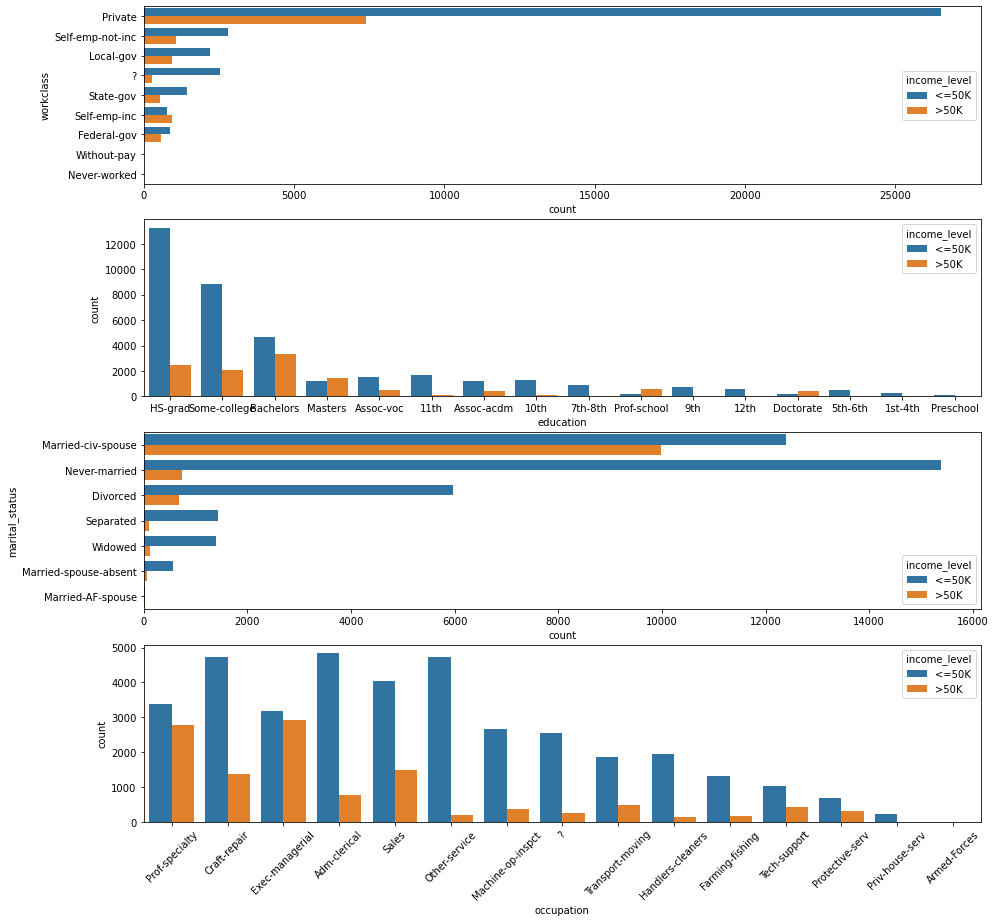

In [15]:
notNum = df.loc[:, ~df.columns.isin(['fnlwgt', 'age', 'capital_gain','capital_loss','hours_per_week','education_num','native_country','income_level'])]

fig, ax = plt.subplots(4,1, figsize=(15, 15))
sns.countplot(data = df, y = notNum.columns.values[0], 
              order = df[notNum.columns.values[0]].value_counts().index, hue = "income_level", ax=ax[0])
sns.countplot(data = df, x = notNum.columns.values[1], 
              order = df[notNum.columns.values[1]].value_counts().index, hue = "income_level", ax=ax[1])
plt.xticks(rotation=45)
sns.countplot(data = df, y = notNum.columns.values[2],
              order = df[notNum.columns.values[2]].value_counts().index, hue = "income_level", ax=ax[2])
sns.countplot(data = df, x = notNum.columns.values[3],
              order = df[notNum.columns.values[3]].value_counts().index, hue = "income_level", ax=ax[3])
plt.xticks(rotation=45)
    
plt.show()

* Workclass - self-emp-inc powyżej 50% >50k, federal-gov ~40% 
* Education - osoby z wykształceniem wyższym - bachelors, masters, prof-school mają wyższy procent "bogatszych" ludzi.
* Marital_status - osoby z partnerami mają zdecydowanie wyższy procent "bogatszych" - około 40%
* Occupation - pracownicy na wysokich stanowiskach, profesorowie - około 45% >50k, zatrudnieni w usługach - ~30%, reszta - niski % 

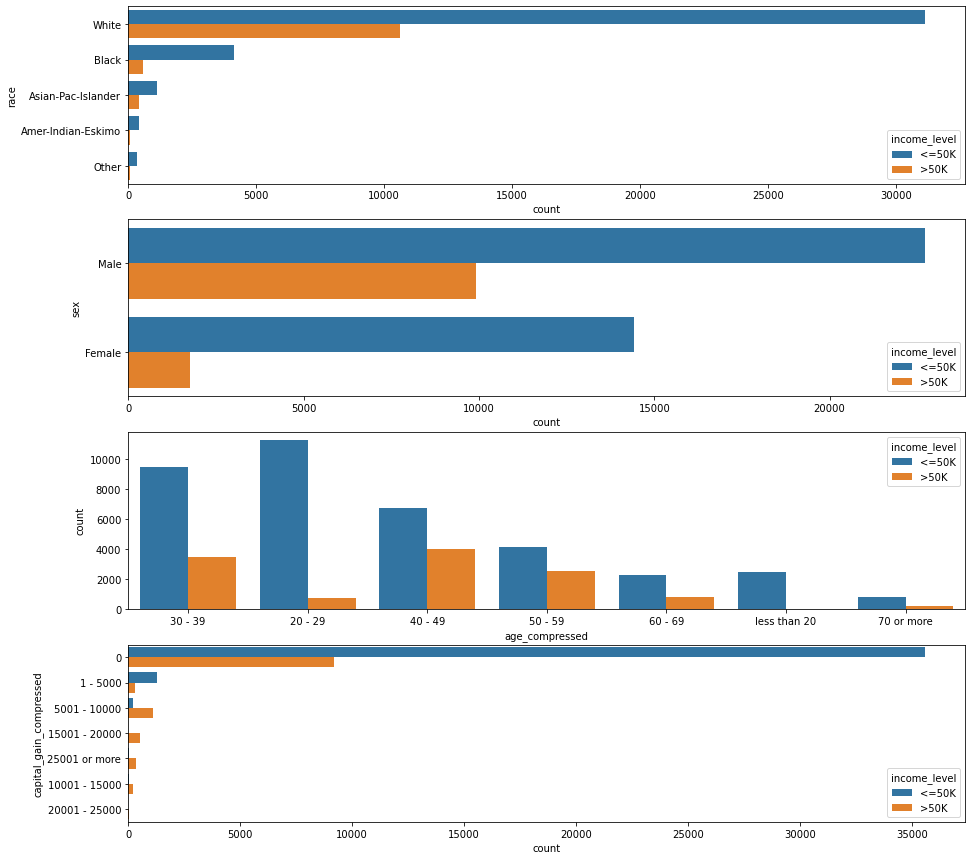

In [16]:
fig, ax = plt.subplots(4,1, figsize=(15, 15))
sns.countplot(data = df, y = notNum.columns.values[5], 
              order = df[notNum.columns.values[5]].value_counts().index, hue = "income_level", ax=ax[0])
sns.countplot(data = df, y = notNum.columns.values[6],
              order = df[notNum.columns.values[6]].value_counts().index, hue = "income_level", ax=ax[1])
sns.countplot(data = df, x = notNum.columns.values[7], 
              order = df[notNum.columns.values[7]].value_counts().index, hue = "income_level", ax=ax[2])
sns.countplot(data = df, y = notNum.columns.values[8], 
              order = df[notNum.columns.values[8]].value_counts().index, hue = "income_level", ax=ax[3])


plt.show()

* Race - osoby o białym kolorze skóry - wyższy procent od reszty grup etnicznych
* Sex - mężczyźni zdecydowanie wyższy procent od kobiet
* Age_compressed - widać stopniowy wzrost procentu bogatszych obywateli wraz z wiekiem. Można to połączyć z ciągłą wspinaczką na szczeblach kariery zawodowej. Nastolatkowie mają 0% odsetek >50k
* Capital_gain_compressed - ludzie mający powyżej 5000 zysków kapitałowych mają prawie 100% zamożnych obywateli

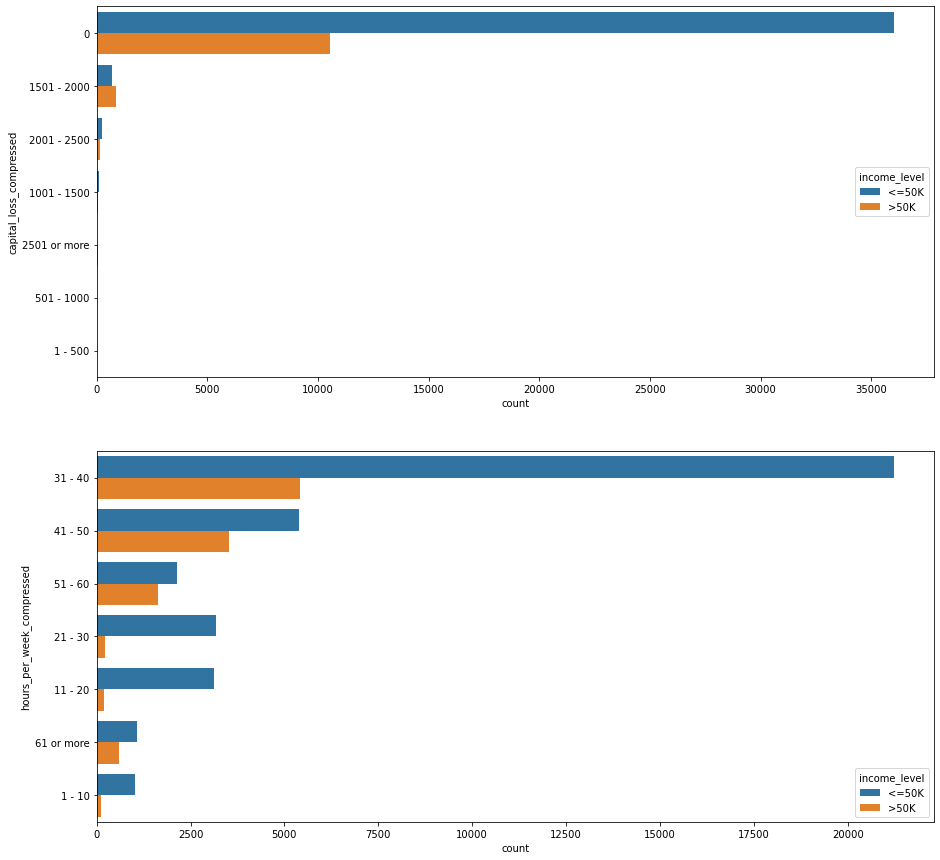

In [17]:
fig, ax = plt.subplots(2,1, figsize=(15, 15))
sns.countplot(data = df, y = notNum.columns.values[9],
              order = df[notNum.columns.values[9]].value_counts().index, hue = "income_level", ax=ax[0])
sns.countplot(data = df, y = notNum.columns.values[10], 
              order = df[notNum.columns.values[10]].value_counts().index, hue = "income_level", ax=ax[1])

plt.show()

In [18]:
df = df.drop(['capital_gain_compressed','capital_loss_compressed','hours_per_week_compressed','age_compressed'],axis=1)

# Preprocessing danych

## Braki danych

Braki danych występują w kolumnach workclass, occupation, native_country pod postacią znaków zapytania. Nie wymagają one obsługi.

## Outliery

### Age

In [19]:
df['age'].value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

In [20]:
upper_lim = df["age"].quantile(.975)
lower_lim = df["age"].quantile(.025)

df["age"]=np.where(df["age"]<lower_lim, lower_lim, df["age"])
df["age"]=np.where(df["age"]>upper_lim, upper_lim, df["age"])
                                                      

print(upper_lim)
print(lower_lim)


68.0
18.0


### Hours_per_week

In [21]:
upper_lim = df["hours_per_week"].quantile(.975)
lower_lim = df["hours_per_week"].quantile(.025)

df["hours_per_week"]=np.where(df["hours_per_week"]<lower_lim, lower_lim, df["hours_per_week"])
df["hours_per_week"]=np.where(df["hours_per_week"]>upper_lim, upper_lim, df["hours_per_week"])

print(upper_lim)
print(lower_lim)

68.0
12.0


In [22]:
upper_lim = df["capital_loss"].quantile(.975)
df["capital_loss"]=np.where(df["capital_loss"]>upper_lim, upper_lim, df["capital_loss"])
print(upper_lim)

1887.0


Zmienne capital_loss, capital_gain nie wymagają obsługi wartości odstających

## Transformacje zmiennych ciągłych na dyskretne

### Age

In [23]:
df['age_decile'] = pd.qcut(df['age'], 10, labels=False, duplicates='drop')
df['age_decile'].value_counts()

0    5897
7    5613
4    5268
2    5013
5    4892
1    4883
9    4578
6    4432
8    4353
3    3913
Name: age_decile, dtype: int64

### Hours_per_week

In [24]:
df['hours_per_week_decile'] = pd.qcut(df['hours_per_week'], 10, labels=False, duplicates='drop')
df['hours_per_week_decile'].value_counts()

2    24158
4     5662
1     5377
0     4955
3     4632
5     4058
Name: hours_per_week_decile, dtype: int64

Zamiana zmiennych capital_loss i capital_gain z ciałgych na dyskretne zmniejszała predykcyjność modeli, dlatego z niej zrezygnowaliśmy.

In [25]:
df_s = df.drop(['sex','race'], axis = 1)

## Kodowanie zmiennych dyskretnych

### Income_level - Label Encoding

In [26]:
le = LabelEncoder()
df.income_level = le.fit_transform(df.income_level)

df_s.income_level = le.fit_transform(df_s.income_level)

### Workclass, Martial_status, Occupation, Relationship, Race, Native_Country, Sex - OneHotEncoding

In [27]:
encoder = ce.OneHotEncoder(cols=['workclass','marital_status','occupation','relationship',
                                 'race','native_country_compressed','sex'], use_cat_names=True, return_df=True,drop_invariant=True)

df = encoder.fit_transform(df)


encoder_s = ce.OneHotEncoder(cols=['workclass','marital_status','occupation','relationship',
                                 'native_country_compressed'], use_cat_names=True, return_df=True)

df_s = encoder_s.fit_transform(df_s)

In [28]:
data = df.drop(['education','native_country','fnlwgt','age','hours_per_week','capital_loss','capital_gain'], axis = 1)

# WOE & IV

In [29]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            '>50K': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature],
            '<=50K': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_>50K'] = dset['>50K'] / dset['>50K'].sum()
    dset['Distr_<=50K'] = dset['<=50K'] / dset['<=50K'].sum()
    dset['WoE'] = np.log(dset['Distr_>50K'] / dset['Distr_<=50K'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_>50K'] - dset['Distr_<=50K']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [30]:
for col in data.columns:
    if col == 'income_level': continue
    else:
        dset, iv = calculate_woe_iv(data, col, 'income_level')
        if (iv > 0.2):
            print('WoE and IV for column: {}'.format(col))
            print(dset)
            print('IV score: {:.2f}'.format(iv))
            print('\n')

WoE and IV for column: education_num
    Value    All  >50K  <=50K  Distr_>50K  Distr_<=50K       WoE        IV
14      1     83     1     82    0.000086     0.002207 -3.250098  0.006895
13      2    247     8    239    0.000685     0.006433 -2.240401  0.012878
2       7   1812    92   1720    0.007872     0.046293 -1.771670  0.068069
11      3    509    27    482    0.002310     0.012973 -1.725486  0.018398
4       5    756    41    715    0.003508     0.019244 -1.702089  0.026783
12      6   1389    87   1302    0.007444     0.035042 -1.549127  0.042753
8       4    955    62    893    0.005305     0.024034 -1.510831  0.028297
15      8    657    48    609    0.004107     0.016391 -1.383996  0.017001
1       9  15784  2503  13281    0.214170     0.357449 -0.512223  0.073391
5      10  10878  2063   8815    0.176521     0.237249 -0.295672  0.017956
7      11   2061   522   1539    0.044665     0.041421  0.075401  0.000245
6      12   1601   413   1188    0.035338     0.031974  0.10004

## Podział na 3 zbiory

In [31]:
x = df.drop(['income_level','native_country','fnlwgt',
             'age','hours_per_week','education'], axis = 1)
y = df.income_level
x_train,x_val,y_train,y_val = train_test_split(x,y,stratify = y, random_state = 0)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,stratify = y_train, random_state = 0)

In [33]:
print(x_train.shape[0])
print(x_test.shape[0])
print(x_val.shape[0])

27473
9158
12211


In [34]:
x_sex_race = df_s.drop(['income_level','education','native_country','fnlwgt',
                      'age','hours_per_week'], axis = 1)

y_sex_race = df_s.income_level
x_train_s,x_val_s,y_train_s,y_val_s = train_test_split(x_sex_race,y_sex_race,stratify = y_sex_race, random_state = 0)

In [35]:
x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(x_train_s,y_train_s,stratify = y_train_s, random_state = 0)

In [36]:
print(x_train_s.shape[0])
print(x_test_s.shape[0])
print(x_val_s.shape[0])

27473
9158
12211


In [37]:
y_val

26542    0
8374     0
30128    0
45365    0
4077     0
        ..
14946    0
37731    0
13243    0
32982    0
26102    0
Name: income_level, Length: 12211, dtype: int32

# Modele

In [41]:
def describe_classifier(Y_true, Y_pred):
    print(f"-----------------------------")
    metrics=[accuracy_score, f1_score, recall_score, precision_score]
    for metric in metrics:
        print(f"{metric.__name__}: \t {metric(Y_true, Y_pred)}")
    print(f"confusion matrix:")
    sns.heatmap(confusion_matrix(Y_true, Y_pred), 
                cmap="Blues", 
                annot=True,
                annot_kws={"size": 16},
                fmt='g')
    plt.show()

In [42]:
def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

### LogisticRegression

-----------------------------
accuracy_score: 	 0.8541841080333418
f1_score: 	 0.6603933536792131
recall_score: 	 0.5924855491329479
precision_score: 	 0.7458828035235542
confusion matrix:


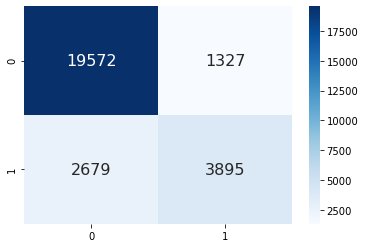

-----------------------------
accuracy_score: 	 0.8542258134963966
f1_score: 	 0.661081492764661
recall_score: 	 0.5942492012779552
precision_score: 	 0.7448512585812357
confusion matrix:


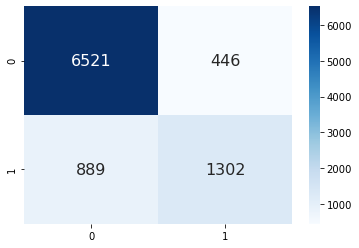

-----------------------------
accuracy_score: 	 0.8546392596838915
f1_score: 	 0.6641438032166509
recall_score: 	 0.6006160164271047
precision_score: 	 0.7426999576809141
confusion matrix:


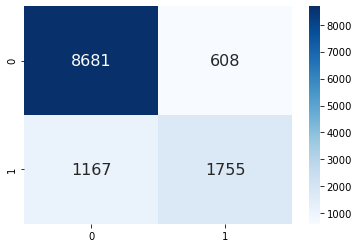

In [470]:
model_LogR = LogisticRegression(solver='liblinear')
model_LogR.fit(x_train,y_train)
y_pred_test = model_LogR.predict(x_test)
y_pred_train = model_LogR.predict(x_train)
y_pred_val = model_LogR.predict(x_val)

describe_classifier(y_train,y_pred_train)
describe_classifier(y_test,y_pred_test)
describe_classifier(y_val,y_pred_val)


In [471]:
print(gini_coefficient(y_pred_train))
print(gini_coefficient(y_pred_test))
print(gini_coefficient(y_pred_val))

0.8099224693335275
0.8091286307053943
0.8064859552862172


| Data  | Accuracy | Precision | F1    | Recall | Gini  |
|-------|----------|-----------|-------|--------|-------|
| Train | 0.854184 | 0.745     | 0.660 | 0.592  | 0.809 |
| Test  | 0.854225 | 0.744     | 0.661 | 0.594  | 0.809 |
| Val   | 0.854639 | 0.742     | 0.664 | 0.600  | 0.806 |

### RandomForest

-----------------------------
accuracy_score: 	 0.9485312852618935
f1_score: 	 0.8893064036323782
recall_score: 	 0.8640097353209614
precision_score: 	 0.9161290322580645
confusion matrix:


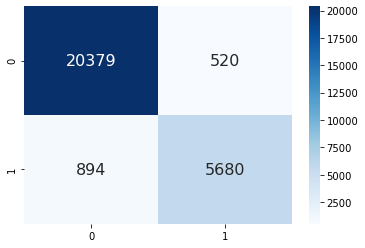

-----------------------------
accuracy_score: 	 0.8468006114872243
f1_score: 	 0.6621719239104262
recall_score: 	 0.6275673208580557
precision_score: 	 0.700815494393476
confusion matrix:


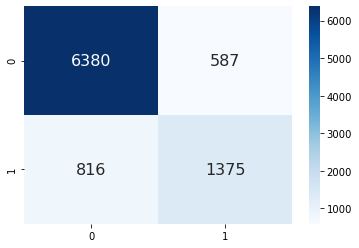

-----------------------------
accuracy_score: 	 0.8479240029481615
f1_score: 	 0.6627928091519885
recall_score: 	 0.6245722108145106
precision_score: 	 0.7059961315280464
confusion matrix:


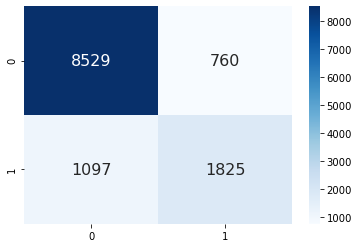

In [165]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)
y_pred_train = model_RF.predict(x_train)
y_pred_test = model_RF.predict(x_test)
y_pred_val = model_RF.predict(x_val)

describe_classifier(y_train,y_pred_train)
describe_classifier(y_test,y_pred_test)
describe_classifier(y_val,y_pred_val)

In [42]:
print(gini_coefficient(y_pred_train))
print(gini_coefficient(y_pred_test))
print(gini_coefficient(y_pred_val))

0.7723583154369745
0.7851059183227779
0.7860945049545491


| Data  | Accuracy | Precision | F1    | Recall | Gini  |
|-------|----------|-----------|-------|--------|-------|
| Train | 0.948    | 0.917     | 0.889 | 0.862  | 0.771 |
| Test  | 0.846    | 0.700     | 0.660 | 0.624  | 0.784 |
| Val   | 0.846    | 0.701     | 0.659 | 0.622  | 0.786 |

### XGBoost

-----------------------------
accuracy_score: 	 0.8883267207804025
f1_score: 	 0.748028909329829
recall_score: 	 0.6927289321569821
precision_score: 	 0.8129239557300963
confusion matrix:


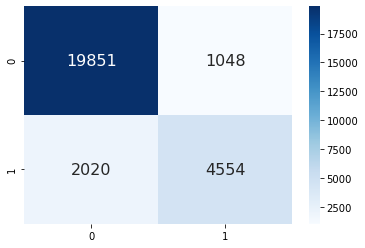

-----------------------------
accuracy_score: 	 0.868421052631579
f1_score: 	 0.7035670356703566
recall_score: 	 0.6526700136923779
precision_score: 	 0.7630736392742796
confusion matrix:


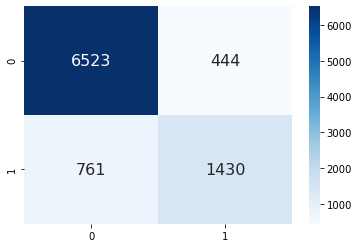

-----------------------------
accuracy_score: 	 0.8721644418966505
f1_score: 	 0.7141549166819264
recall_score: 	 0.6673511293634496
precision_score: 	 0.7680189050807404
confusion matrix:


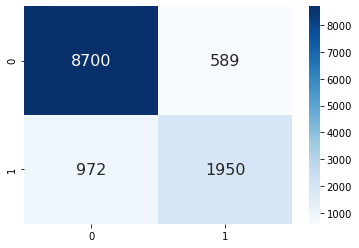

In [166]:
model_XGB=XGBClassifier(eval_metric='logloss')
model_XGB.fit(x_train, y_train)
y_pred_train = model_XGB.predict(x_train)
y_pred_test = model_XGB.predict(x_test)
y_pred_val = model_XGB.predict(x_val)


describe_classifier(y_train,y_pred_train)
describe_classifier(y_test,y_pred_test)
describe_classifier(y_val,y_pred_val)

In [44]:
print(gini_coefficient(y_pred_train))
print(gini_coefficient(y_pred_test))
print(gini_coefficient(y_pred_val))

0.7960907072398354
0.7953701681589866
0.7920727213168455


| Data  | Accuracy | Precision | F1    | Recall | Gini  |
|-------|----------|-----------|-------|--------|-------|
| Train | 0.888    | 0.812     | 0.748 | 0.652  | 0.796 |
| Test  | 0.868    | 0.763     | 0.703 | 0.652  | 0.795 |
| Val   | 0.872    | 0.768     | 0.714 | 0.667  | 0.792 |

## Hard vs Soft voting

In [171]:
estimators=[('DecisionTree', model_RF), ('XGBoost', model_XGB), ('LR', model_LogR)]

### Hard voting

-----------------------------
accuracy_score: 	 0.8975721617588177
f1_score: 	 0.7676300578034684
recall_score: 	 0.7070276848189839
precision_score: 	 0.8395953757225434
confusion matrix:


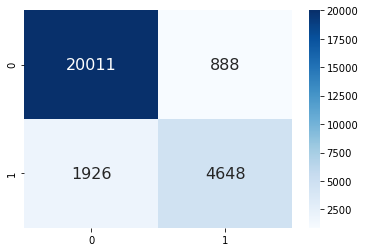

-----------------------------
accuracy_score: 	 0.864271675038218
f1_score: 	 0.6908729171847798
recall_score: 	 0.6339570972158831
precision_score: 	 0.759016393442623
confusion matrix:


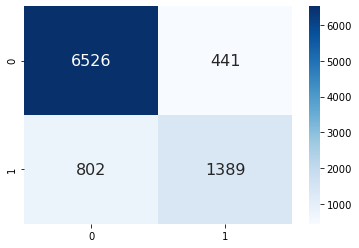

-----------------------------
accuracy_score: 	 0.8679878797805257
f1_score: 	 0.7012601927353594
recall_score: 	 0.6475017111567419
precision_score: 	 0.7647534357316087
confusion matrix:


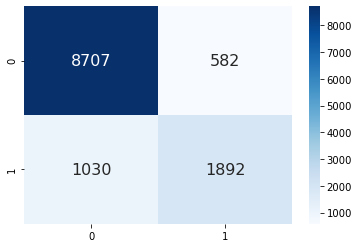

In [172]:
model_hard = VotingClassifier(estimators=estimators, voting='hard')
model_hard.fit(x_train,y_train)
y_pred_train = model_hard.predict(x_train)
y_pred_test = model_hard.predict(x_test)
y_pred_val = model_hard.predict(x_val)

describe_classifier(y_train,y_pred_train)
describe_classifier(y_test,y_pred_test)
describe_classifier(y_val,y_pred_val)

In [65]:
print(gini_coefficient(y_pred_train))
print(gini_coefficient(y_pred_test))
print(gini_coefficient(y_pred_val))

0.8031157864084738
0.8025769818737717
0.7999344853001392


| Data  | Accuracy | Precision | F1    | Recall | Gini  |
|-------|----------|-----------|-------|--------|-------|
| Train | 0.898    | 0.850     | 0.767 | 0.699  | 0.803 |
| Test  | 0.864    | 0.762     | 0.690 | 0.630  | 0.802 |
| Val   | 0.867    | 0.765     | 0.697 | 0.639  | 0.800 |

### Soft voting

-----------------------------
accuracy_score: 	 0.9114039238525098
f1_score: 	 0.7997696610727212
recall_score: 	 0.73942804989352
precision_score: 	 0.8708348262271587
confusion matrix:


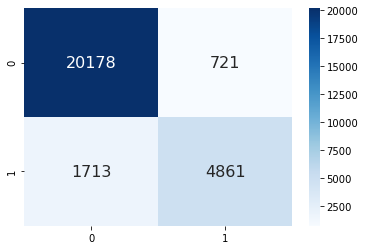

-----------------------------
accuracy_score: 	 0.8639440925966368
f1_score: 	 0.6905116741182314
recall_score: 	 0.6344135098128708
precision_score: 	 0.7574931880108992
confusion matrix:


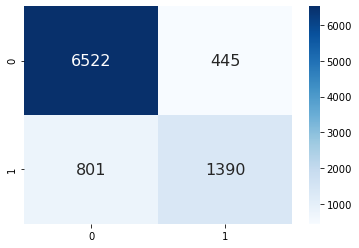

-----------------------------
accuracy_score: 	 0.8673327327819179
f1_score: 	 0.7004437869822485
recall_score: 	 0.648186173853525
precision_score: 	 0.7618664521319388
confusion matrix:


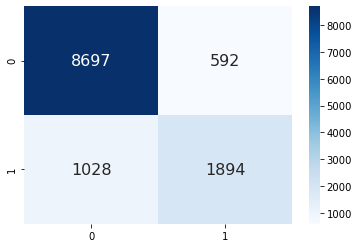

In [173]:
model_soft = VotingClassifier(estimators=estimators, voting='soft')
model_soft.fit(x_train,y_train)
y_pred_train = model_soft.predict(x_train)
y_pred_test = model_soft.predict(x_test)
y_pred_val = model_soft.predict(x_val)

describe_classifier(y_train,y_pred_train)
describe_classifier(y_test,y_pred_test)
describe_classifier(y_val,y_pred_val)

In [67]:
print(gini_coefficient(y_pred_train))
print(gini_coefficient(y_pred_test))
print(gini_coefficient(y_pred_val))

0.8006406289811815
0.8020310111378031
0.7996888051756613


| Data  | Accuracy | Precision | F1    | Recall | Gini  |
|-------|----------|-----------|-------|--------|-------|
| Train | 0.911    | 0.878     | 0.798 | 0.732  | 0.800 |
| Test  | 0.865    | 0.764     | 0.691 | 0.630  | 0.802 |
| Val   | 0.866    | 0.764     | 0.697 | 0.640  | 0.799 |

### Stacking

-----------------------------
accuracy_score: 	 0.8886907145197103
f1_score: 	 0.7468123861566485
recall_score: 	 0.686035898996045
precision_score: 	 0.8194040697674418
confusion matrix:


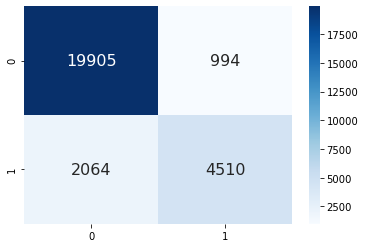

-----------------------------
accuracy_score: 	 0.8690762175147412
f1_score: 	 0.7025551972215331
recall_score: 	 0.6462802373345504
precision_score: 	 0.7695652173913043
confusion matrix:


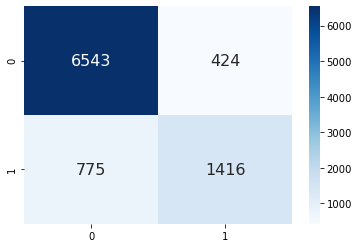

-----------------------------
accuracy_score: 	 0.8723282286463026
f1_score: 	 0.7119896545353779
recall_score: 	 0.659479808350445
precision_score: 	 0.7735849056603774
confusion matrix:


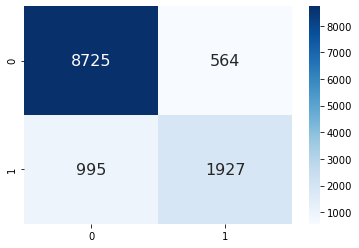

In [174]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
y_pred_val = clf.predict(x_val)

describe_classifier(y_train,y_pred_train)
describe_classifier(y_test,y_pred_test)
describe_classifier(y_val,y_pred_val)

In [69]:
print(gini_coefficient(y_pred_train))
print(gini_coefficient(y_pred_test))
print(gini_coefficient(y_pred_val))

0.8028973901648891
0.8017034286962219
0.7981328310539677


| Data  | Accuracy | Precision | F1    | Recall | Gini  |
|-------|----------|-----------|-------|--------|-------|
| Train | 0.887    | 0.822     | 0.742 | 0.677  | 0.802 |
| Test  | 0.869    | 0.774     | 0.701 | 0.641  | 0.801 |
| Val   | 0.872    | 0.777     | 0.711 | 0.655  | 0.798 |

### Bagging

-----------------------------
accuracy_score: 	 0.8518181487278419
f1_score: 	 0.6604953715286465
recall_score: 	 0.6023729844843322
precision_score: 	 0.7310319364962157
confusion matrix:


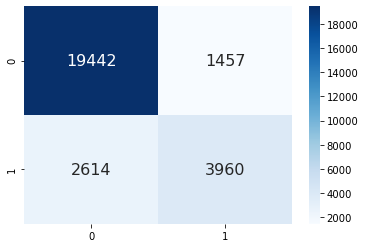

-----------------------------
accuracy_score: 	 0.8511683773749728
f1_score: 	 0.6553729456384323
recall_score: 	 0.5915107256960292
precision_score: 	 0.7346938775510204
confusion matrix:


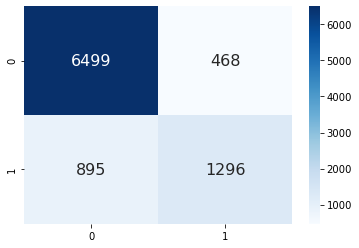

-----------------------------
accuracy_score: 	 0.8532470723118499
f1_score: 	 0.6650467289719626
recall_score: 	 0.608829568788501
precision_score: 	 0.7327018121911038
confusion matrix:


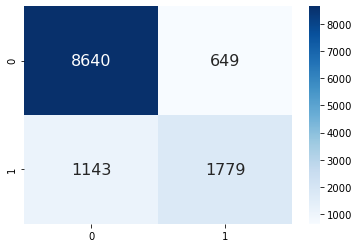

In [175]:
clf = BaggingClassifier(base_estimator=model_LogR,
                        n_estimators=10, random_state=0)
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
y_pred_val = clf.predict(x_val)

describe_classifier(y_train,y_pred_train)
describe_classifier(y_test,y_pred_test)
describe_classifier(y_val,y_pred_val)

In [71]:
print(gini_coefficient(y_pred_train))
print(gini_coefficient(y_pred_test))
print(gini_coefficient(y_pred_val))

0.8078113056455429
0.80694474776152
0.80419294079109


| Data  | Accuracy | Precision | F1    | Recall | Gini  |
|-------|----------|-----------|-------|--------|-------|
| Train | 0.853    | 0.741     | 0.660 | 0.595  | 0.766 |
| Test  | 0.854    | 0.743     | 0.664 | 0.600  | 0.772 |
| Val   | 0.855    | 0.741     | 0.667 | 0.606  | 0.804 |

## Dla danych bez rasy i płci:

### LogisticRegression

-----------------------------
accuracy_score: 	 0.8273213700724348
f1_score: 	 0.5487062404870624
recall_score: 	 0.4386979008214177
precision_score: 	 0.7323514474352463
confusion matrix:


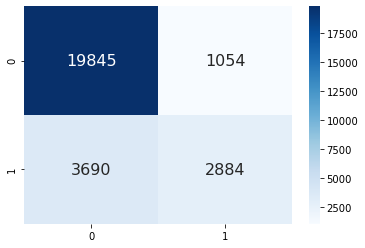

-----------------------------
accuracy_score: 	 0.8298755186721992
f1_score: 	 0.5588901472253681
recall_score: 	 0.4504792332268371
precision_score: 	 0.7360178970917226
confusion matrix:


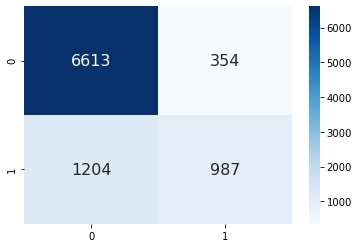

-----------------------------
accuracy_score: 	 0.8291704201130129
f1_score: 	 0.5576759966072943
recall_score: 	 0.45003422313483915
precision_score: 	 0.7329988851727982
confusion matrix:


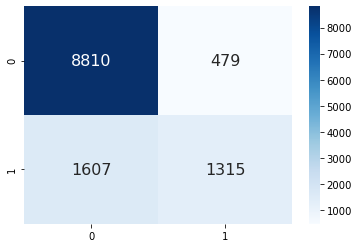

In [176]:
model_LogR = LogisticRegression()
model_LogR.fit(x_train_s,y_train_s)
y_pred_train_s = model_LogR.predict(x_train_s)
y_pred_test_s = model_LogR.predict(x_test_s)
y_pred_val_s = model_LogR.predict(x_val_s)

describe_classifier(y_train_s,y_pred_train_s)
describe_classifier(y_test_s,y_pred_test_s)
describe_classifier(y_val_s,y_pred_val_s)

In [73]:
print(gini_coefficient(y_pred_train_s))
print(gini_coefficient(y_pred_test_s))
print(gini_coefficient(y_pred_val_s))

0.8566592654606342
0.8535706486132343
0.853083285562198


| Data  | Accuracy | Precision | F1    | Recall | Gini  |
|-------|----------|-----------|-------|--------|-------|
| Train | 0.826    | 0.732     | 0.546 | 0.436  | 0.857 |
| Test  | 0.829    | 0.735     | 0.557 | 0.448  | 0.854 |
| Val   | 0.829    | 0.734     | 0.558 | 0.450  | 0.853 |

### RandomForest

-----------------------------
accuracy_score: 	 0.9423069923197321
f1_score: 	 0.8754811846963628
recall_score: 	 0.8475813811986614
precision_score: 	 0.9052802599512592
confusion matrix:


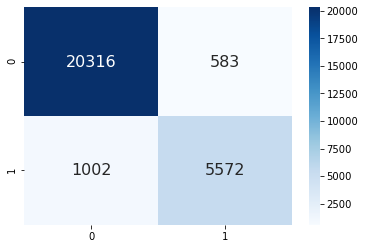

-----------------------------
accuracy_score: 	 0.847674164664774
f1_score: 	 0.662799129804206
recall_score: 	 0.625741670470105
precision_score: 	 0.7045220966084276
confusion matrix:


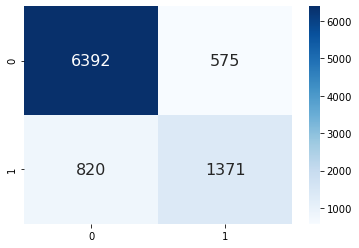

-----------------------------
accuracy_score: 	 0.8477602161985095
f1_score: 	 0.6637728341472238
recall_score: 	 0.6279945242984257
precision_score: 	 0.7038741848868432
confusion matrix:


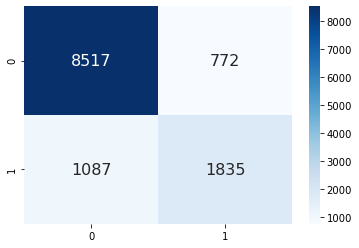

In [177]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train_s, y_train_s)
y_pred_train_s = model_RF.predict(x_train_s)
y_pred_test_s = model_RF.predict(x_test_s)
y_pred_val_s = model_RF.predict(x_val_s)

describe_classifier(y_train_s,y_pred_train_s)
describe_classifier(y_test_s,y_pred_test_s)
describe_classifier(y_val_s,y_pred_val_s)

In [75]:
print(gini_coefficient(y_pred_train_s))
print(gini_coefficient(y_pred_test_s))
print(gini_coefficient(y_pred_val_s))

0.774469479124959
0.7843415592924219
0.7849479977069855


| Data  | Accuracy | Precision | F1    | Recall | Gini  |
|-------|----------|-----------|-------|--------|-------|
| Train | 0.942    | 0.901     | 0.875 | 0.851  | 0.774 |
| Test  | 0.845    | 0.702     | 0.664 | 0.631  | 0.784 |
| Val   | 0.845    | 0.696     | 0.660 | 0.626  | 0.784 |

### XGBoost

-----------------------------
accuracy_score: 	 0.884650384013395
f1_score: 	 0.7385097780344912
recall_score: 	 0.6807118953452996
precision_score: 	 0.8070333633904418
confusion matrix:


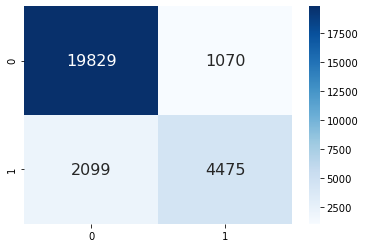

-----------------------------
accuracy_score: 	 0.8671107228652544
f1_score: 	 0.6986877940084179
recall_score: 	 0.643998174349612
precision_score: 	 0.7635281385281385
confusion matrix:


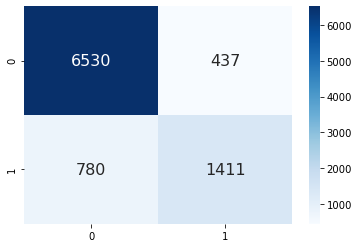

-----------------------------
accuracy_score: 	 0.8731471623945622
f1_score: 	 0.714890484078778
recall_score: 	 0.6646132785763176
precision_score: 	 0.7733970529669454
confusion matrix:


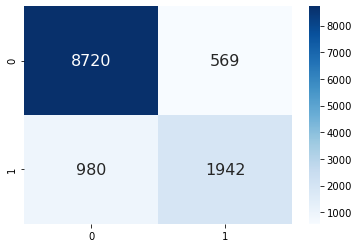

In [178]:
model_XGB=XGBClassifier(eval_metric='logloss')
model_XGB.fit(x_train_s, y_train_s)
y_pred_train_s = model_XGB.predict(x_train_s)
y_pred_test_s = model_XGB.predict(x_test_s)
y_pred_val_s = model_XGB.predict(x_val_s)

describe_classifier(y_train_s,y_pred_train_s)
describe_classifier(y_test_s,y_pred_test_s)
describe_classifier(y_val_s,y_pred_val_s)

In [77]:
print(gini_coefficient(y_pred_train_s))
print(gini_coefficient(y_pred_test_s))
print(gini_coefficient(y_pred_val_s))

0.7981654715538893
0.7982092159860231
0.7943657358119728


| Data  | Accuracy | Precision | F1    | Recall | Gini  |
|-------|----------|-----------|-------|--------|-------|
| Train | 0.884    | 0.807     | 0.738 | 0.680  | 0.798 |
| Test  | 0.867    | 0.763     | 0.698 | 0.643  | 0.798 |
| Val   | 0.873    | 0.773     | 0.714 | 0.664  | 0.794 |

Najlepszym modelem dla danych bez płci jest XGBoost.

# Podsumowanie

## Train

| Model              | Accuracy | Precision | F1    | Recall | Gini  |
|--------------------|----------|-----------|-------|--------|-------|
| LogisticRegression | 0.853    | 0.736     | 0.662 | 0.602  | 0.767 |
| RandomForest       | 0.943    | 0.908     | 0.977 | 0.847  | 0.910 |
| XGBoost            | 0.885    | 0.807     | 0.740 | 0.682  | 0.795 |
| Hard voting        | 0.893    | 0.835     | 0.756 | 0.690  | 0.824 |
| Soft voting        | 0.907    | 0.867     | 0.787 | 0.721  | 0.843 |
| Stacking           | 0.886    | 0.815     | 0.740 | 0.678  | 0.815 |
| Bagging            | 0.853    | 0.737     | 0.662 | 0.600  | 0.766 |

## Test

| Model              | Accuracy | Precision | F1    | Recall | Gini  |
|--------------------|----------|-----------|-------|--------|-------|
| LogisticRegression | 0.856    | 0.739     | 0.671 | 0.614  | 0.773 |
| RandomForest       | 0.848    | 0.707     | 0.663 | 0.625  | 0.771 |
| XGBoost            | 0.873    | 0.772     | 0.714 | 0.665  | 0.796 |
| Hard voting        | 0.870    | 0.771     | 0.705 | 0.648  | 0.794 |
| Soft voting        | 0.869    | 0.772     | 0.701 | 0.642  | 0.791 |
| Stacking           | 0.874    | 0.780     | 0.715 | 0.660  | 0.801 |
| Bagging            | 0.854    | 0.734     | 0.669 | 0.614  | 0.772 |

## Validation

| Model              | Accuracy | Precision | F1    | Recall | Gini  |
|--------------------|----------|-----------|-------|--------|-------|
| LogisticRegression | 0.854    | 0.742     | 0.664 | 0.600  | 0.806 |
| RandomForest       | 0.846    | 0.701     | 0.659 | 0.622  | 0.785 |
| XGBoost            | 0.872    | 0.768     | 0.714 | 0.667  | 0.792 |
| Hard voting        | 0.867    | 0.765     | 0.697 | 0.639  | 0.800 |
| Soft voting        | 0.866    | 0.764     | 0.697 | 0.640  | 0.799 |
| Stacking           | 0.872    | 0.777     | 0.711 | 0.655  | 0.798 |
| Bagging            | 0.855    | 0.741     | 0.667 | 0.606  | 0.804 |


Na podstawie wyników można stwierdzić, że najlepszym modelami są XGBoost oraz Stacking.

# Hiperparametry

### LogisticRegression

In [69]:
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear']
param_grid = {'solver' : solver,
              'penalty' : penalty,
              'C' : c_values}

In [70]:
grid = GridSearchCV(estimator=model_LogR, param_grid=param_grid, cv = 3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train) 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.852400 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


### RandomForest

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
grid = GridSearchCV(estimator=model_RF, param_grid=param_grid, cv = 3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train) 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.862629 using {'max_depth': 80, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 400}

### XGBoost

In [6]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
learning_rate = [0.01,0.05,0.1]
base_score = [0.5, 0.7, 0.9, 0.2]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'base_score': base_score}

In [ ]:
grid = GridSearchCV(estimator=model_XGB, param_grid=param_grid, cv = 3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train) 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.878717 using {'base_score': 0.5, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 2000, 'learning_rate': 0.01}

### Stacking

In [39]:
best_LogR = LogisticRegression(C=10,penalty='l2',solver='newton-cg')
best_RF = RandomForestClassifier(max_depth=80,min_samples_split=10,n_estimators=400)
best_XGB = XGBClassifier(base_score=0.5, max_depth=5, min_child_weight=4,n_estimators=2000,learning_rate=0.01)

In [298]:
best_estimators=[('DecisionTree', best_RF), ('XGBoost', best_XGB), ('LR', best_LogR)]

In [299]:
best_clf = StackingClassifier(estimators=best_estimators, final_estimator=best_LogR)

[04:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

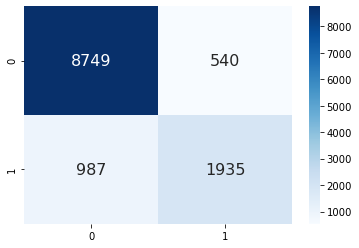

In [340]:
best_clf.fit(x_train, y_train)
y_pred_val = best_clf.predict(x_val)

describe_classifier(y_val,y_pred_val)

## Porównanie hiperparametrów do domyślnych wartości

| Model              | Default Accuracy | Hiperparameter Accuracy  |
|--------------------|-----------|-------------|
| LogisticRegression | 0.854     |  0.855      | 
|RandomForest|0.846 | 0.861|
|XGBoost|0.872 | 0.872|
|Stacking|0.872 | 0.872|

# Najlepszy model

[04:17:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------
accuracy_score: 	 0.8787172860626797
f1_score: 	 0.7240351167798575
recall_score: 	 0.6648919987830849
precision_score: 	 0.7947272727272727
confusion matrix:


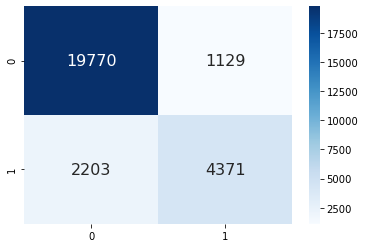

-----------------------------
accuracy_score: 	 0.8685302467787727
f1_score: 	 0.7009438648782912
recall_score: 	 0.643998174349612
precision_score: 	 0.7689373297002725
confusion matrix:


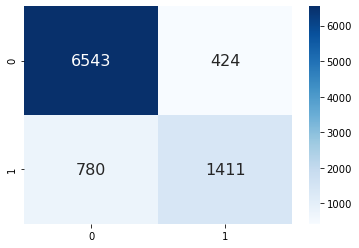

-----------------------------
accuracy_score: 	 0.8751944967652117
f1_score: 	 0.7172541743970315
recall_score: 	 0.661533196440794
precision_score: 	 0.7832252836304701
confusion matrix:


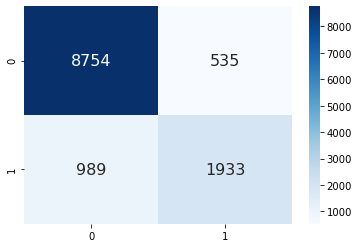

In [375]:
best_XGB.fit(x_train,y_train)
y_pred_train = best_XGB.predict(x_train)
y_pred_test = best_XGB.predict(x_test)
y_pred_val = best_XGB.predict(x_val)

describe_classifier(y_train,y_pred_train)
describe_classifier(y_test,y_pred_test)
describe_classifier(y_val,y_pred_val)

Najlepszym modelem okazał się XGBoost.

# Najlepszy model dla danych bez rasy i płci

[04:11:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------
accuracy_score: 	 0.877115713609726
f1_score: 	 0.7191815005822659
recall_score: 	 0.6575905080620627
precision_score: 	 0.7935022026431718
confusion matrix:


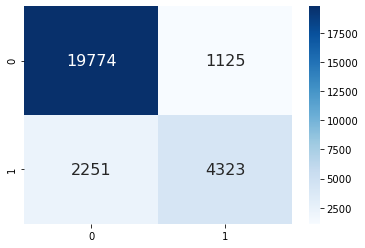

-----------------------------
accuracy_score: 	 0.86874863507316
f1_score: 	 0.7002493765586034
recall_score: 	 0.6408032861706983
precision_score: 	 0.7718526663001649
confusion matrix:


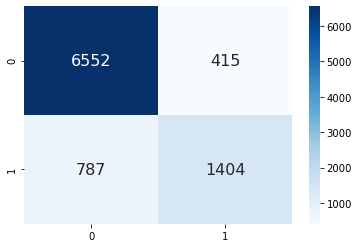

-----------------------------
accuracy_score: 	 0.8747031365162559
f1_score: 	 0.7158246656760773
recall_score: 	 0.659479808350445
precision_score: 	 0.7826969943135662
confusion matrix:


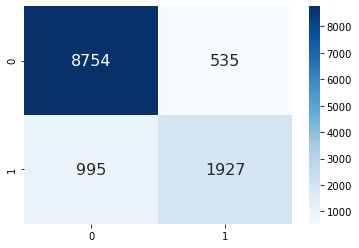

In [359]:
best_XGB.fit(x_train_s, y_train_s)
y_pred_train_s = best_XGB.predict(x_train_s)
y_pred_test_s = best_XGB.predict(x_test_s)
y_pred_val_s = best_XGB.predict(x_val_s)

describe_classifier(y_train_s,y_pred_train_s)
describe_classifier(y_test_s,y_pred_test_s)
describe_classifier(y_val_s,y_pred_val_s)

Dla danych bez rasy i płci najlepszym modelem również jest XGBoost.

# Najlepszy model trenowany na zbiorze treningowym i testowym

In [37]:
x_train_test = x_train.append(x_test)
y_train_test = y_train.append(y_test)

[17:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------
accuracy_score: 	 0.8767710409216237
f1_score: 	 0.7191738210775164
recall_score: 	 0.6594409583571021
precision_score: 	 0.7908058557942262
confusion matrix:


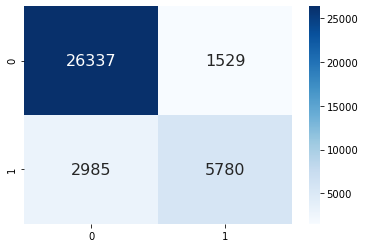

-----------------------------
accuracy_score: 	 0.8761772172631234
f1_score: 	 0.72
recall_score: 	 0.6652977412731006
precision_score: 	 0.784503631961259
confusion matrix:


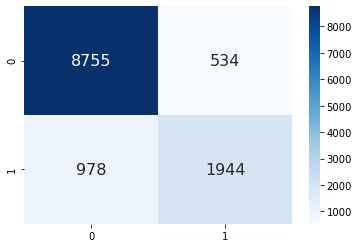

In [43]:
best_XGB.fit(x_train_test,y_train_test)
y_pred_train = best_XGB.predict(x_train_test)
y_pred_val = best_XGB.predict(x_val)

describe_classifier(y_train_test,y_pred_train)
describe_classifier(y_val,y_pred_val)